# Auto Code - NLP text prediction
### Description :
Auto code is a NLP model that can predict python code snippets with the provided code to it. It is a LSTM (Long Short Term Memory model) with word Embedding.

It is trained with 606 rows of code snippets on a Macbook M1 Pro with a Total embedding word size of 237. The major thing I have tried in the project is to make the tokenizer of tensorflow detect Special characters.

Special characters are converted to texts and then are tokenized and is reversed back to symbols after prediction.

### Input size
(91,)

#### Training with more data:
To train the model with more data just add more code snippets in each cell of dataset.csv or add more data as python list in dataprocessing.ipynb file and run code to append data to csv file

#### Frameworks and Languages used
* Tensorflow
* Pandas
* Numpy
* Matlab

### Modules Required for training and data processing

In [508]:
#Modules
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import InputLayer,Embedding,Bidirectional,LSTM,Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

### Data in dataset.csv file

In [78]:
dataset=pd.read_csv('./dataset.csv')

In [79]:
dataset

,Code
0,"print(""Hello, World!"")"
1,"def add_numbers(a, b): return a + b"
2,for i in range(5): print(i)
3,class MyClass:\n def __init__(self): pass
4,"my_list = [1, 2, 3, 4, 5]"
...,...
600,"result = ""Hello, World!""[::-1]"
601,"result = ""Hello, World!"".index(""World"")"
602,"result = ""Hello, World!"".replace(""Hello"", ""Hi"")"
603,"result = ""Hello, World!"".find(""World"")"


In [80]:
codes=dataset['Code'].to_numpy()

##### Array of data

In [81]:
codes

array(['print("Hello, World!")', 'def add_numbers(a, b): return a + b',
       'for i in range(5): print(i)',
       'class MyClass:\n    def __init__(self): pass',
       'my_list = [1, 2, 3, 4, 5]',
       'result = [x for x in my_list if x % 2 == 0]',
       'try:\n    result = 10 / 0\nexcept ZeroDivisionError:\n    result = "Error"',
       'import math\nresult = math.sqrt(25)',
       'def greet(name="User"): return f"Hello, {name}!"',
       'print(f"The sum of 3 and 5 is {3 + 5}")',
       'file_path = "example.txt"\nwith open(file_path, "r") as file:\n    content = file.read()',
       'def factorial(n):\n    return 1 if n == 0 else n * factorial(n-1)',
       'my_dict = {"name": "John", "age": 25}',
       'class Dog:\n    def bark(self): print("Woof!")',
       'result = list(map(lambda x: x * 2, [1, 2, 3, 4]))',
       'def square(x): return x ** 2',
       'numbers = [1, 2, 3, 4, 5]\nsquared_numbers = list(map(square, numbers))',
       'def is_even(x): return x % 2 == 0',


In [82]:
codes.shape

(605,)

### Dictionary used to name special characters in the keyboard for Tokenizer to tokenize it as text

In [83]:
#symbols variable
symbols={
    '!':'excl',
    '@':'at',
    '#':'hasht',
    '$':'dlr',
    '%':'per',
    '^':'pwr',
    '&':'amp',
    '*':'mul',
    '(':'paropn',
    ')':'parcls',
    '_':'underscr',
    '-':'mis',
    '+':'pls',
    '=':'eql',
    '{':'curopn',
    '}':'curcls',
    '[':'sqropn',
    ']':'sqrcls',
    '|':'br',
    "/":'lftslash',
    ":":'cln',
    ';':'semicln',
    '"':'dblqut',
    "'":'qut',
    "<":"lsthn",
    ">":"rgtthn",
    ",":"com",
    ".":"dot",
    "?":"qustn",
    "~":"tld",
    "`":'apost',
    "\n":"nwline",
    "\\":'bkslash',
    "\t":"tb",
    "\'":"sglquote",
    "\"":"dblquote",
    "\b":'bkspace',
    '\f':'fmfeed',
    "\r":'carreturn',
    " ":"space"
}

In [84]:
print("Symbols: ",symbols)

Symbols:  {'!': 'excl', '@': 'at', '#': 'hasht', '$': 'dlr', '%': 'per', '^': 'pwr', '&': 'amp', '*': 'mul', '(': 'paropn', ')': 'parcls', '_': 'underscr', '-': 'mis', '+': 'pls', '=': 'eql', '{': 'curopn', '}': 'curcls', '[': 'sqropn', ']': 'sqrcls', '|': 'br', '/': 'lftslash', ':': 'cln', ';': 'semicln', '"': 'dblquote', "'": 'sglquote', '<': 'lsthn', '>': 'rgtthn', ',': 'com', '.': 'dot', '?': 'qustn', '~': 'tld', '`': 'apost', '\n': 'nwline', '\\': 'bkslash', '\t': 'tb', '\x08': 'bkspace', '\x0c': 'fmfeed', '\r': 'carreturn', ' ': 'space'}


### Funtion used to convert all special characters to strings

In [85]:
#Symbols to String function
def symbols_string(symbols_dict,sentences):
    return_lst=[]
    keys=list(symbols_dict.keys())
    values=list(symbols_dict.values())
    for sentence in sentences:
        chars=[char for char in sentence]
        for char in chars:
            if char in keys:
                char_index=chars.index(char)
                key_index=keys.index(char)
                chars[char_index]=" "+values[key_index]+" "
        string_sentence="".join(chars)
        return_lst.append(string_sentence)
    return_lst=np.array(return_lst)
    return return_lst

In [86]:
codes=symbols_string(symbols_dict=symbols,sentences=codes)

#### Codes snippent after special characters to text conversion

In [87]:
codes

array(['print paropn  dblquote Hello com  space World excl  dblquote  parcls ',
       'def space add underscr numbers paropn a com  space b parcls  cln  space return space a space  pls  space b',
       'for space i space in space range paropn 5 parcls  cln  space print paropn i parcls ',
       'class space MyClass cln  nwline  space  space  space  space def space  underscr  underscr init underscr  underscr  paropn self parcls  cln  space pass',
       'my underscr list space  eql  space  sqropn 1 com  space 2 com  space 3 com  space 4 com  space 5 sqrcls ',
       'result space  eql  space  sqropn x space for space x space in space my underscr list space if space x space  per  space 2 space  eql  eql  space 0 sqrcls ',
       'try cln  nwline  space  space  space  space result space  eql  space 10 space  lftslash  space 0 nwline except space ZeroDivisionError cln  nwline  space  space  space  space result space  eql  space  dblquote Error dblquote ',
       'import space math nwline

### Tokenizing with Tensoflow Tokenizer class

In [88]:
code_tokenizer=Tokenizer()

In [89]:
code_tokenizer.fit_on_texts(codes)

### Token words

In [90]:
word_index=code_tokenizer.word_index

In [91]:
total_words=len(word_index)+1

In [92]:
print("Word index: ",word_index)
print("Total word index: ",total_words)

Word index:  {'space': 1, 'dblquote': 2, 'com': 3, 'eql': 4, 'paropn': 5, 'parcls': 6, 'result': 7, 'dot': 8, 'hello': 9, 'world': 10, 'excl': 11, '1': 12, 'sqropn': 13, 'sqrcls': 14, '2': 15, '3': 16, 'cln': 17, '5': 18, 'x': 19, '4': 20, 'range': 21, 'mul': 22, 'true': 23, 'underscr': 24, 'nwline': 25, 'list': 26, '9': 27, '6': 28, 'curopn': 29, 'curcls': 30, 'i': 31, '10': 32, '123': 33, '0': 34, 'in': 35, 'mis': 36, 'for': 37, 'format': 38, 'pls': 39, 'name': 40, 'false': 41, 'per': 42, 'lambda': 43, 'len': 44, '65': 45, 'replace': 46, 'hi': 47, 'find': 48, 'python': 49, 'count': 50, 'round': 51, '66': 52, '67': 53, 'b': 54, '11': 55, 'import': 56, 'def': 57, 'sum': 58, 'filter': 59, '456': 60, 'return': 61, 'upper': 62, 'if': 63, 'f': 64, 'apple': 65, 'john': 66, 'banana': 67, 'a': 68, 'abc': 69, 'all': 70, 'join': 71, 'cherry': 72, 'any': 73, 'max': 74, 'min': 75, 'sorted': 76, 'reversed': 77, '14159': 78, 'divmod': 79, 'bytearray': 80, 'memoryview': 81, 'lower': 82, 'strip': 83,

## n-grams

#### n-grams are used for training the model
##### n-grams are made by sequencing the texts and spliting it X and Y 

In [93]:
n_grams=[]
for code in codes:
    sequence=code_tokenizer.texts_to_sequences([code])[0]
    for i in range(1,len(sequence)):
        n_gram=sequence[:i+1]
        n_grams.append(n_gram)

In [94]:
n_grams

[[114, 5],
 [114, 5, 2],
 [114, 5, 2, 9],
 [114, 5, 2, 9, 3],
 [114, 5, 2, 9, 3, 1],
 [114, 5, 2, 9, 3, 1, 10],
 [114, 5, 2, 9, 3, 1, 10, 11],
 [114, 5, 2, 9, 3, 1, 10, 11, 2],
 [114, 5, 2, 9, 3, 1, 10, 11, 2, 6],
 [57, 1],
 [57, 1, 118],
 [57, 1, 118, 24],
 [57, 1, 118, 24, 110],
 [57, 1, 118, 24, 110, 5],
 [57, 1, 118, 24, 110, 5, 68],
 [57, 1, 118, 24, 110, 5, 68, 3],
 [57, 1, 118, 24, 110, 5, 68, 3, 1],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54, 6],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54, 6, 17],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54, 6, 17, 1],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54, 6, 17, 1, 61],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54, 6, 17, 1, 61, 1],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54, 6, 17, 1, 61, 1, 68],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54, 6, 17, 1, 61, 1, 68, 1],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54, 6, 17, 1, 61, 1, 68, 1, 39],
 [57, 1, 118, 24, 110, 5, 68, 3, 1, 54, 6, 17, 1, 61, 1, 68, 1, 39, 1],
 [57, 1, 118, 24, 110, 5

In [95]:
max_length=max([len(n_gram) for n_gram in n_grams])

In [96]:
max_length

91

### Padding n-grams to be of same length

In [97]:
padded_n_grams=pad_sequences(
    n_grams,maxlen=max_length,padding="pre"
)

In [98]:
padded_n_grams

array([[  0,   0,   0, ...,   0, 114,   5],
       [  0,   0,   0, ..., 114,   5,   2],
       [  0,   0,   0, ...,   5,   2,   9],
       ...,
       [  0,   0,   0, ...,   5,   2,  95],
       [  0,   0,   0, ...,   2,  95,   2],
       [  0,   0,   0, ...,  95,   2,   6]], dtype=int32)

### X data

In [99]:
X=padded_n_grams[:,:-1]

### Y Data

In [100]:
Y=padded_n_grams[:,-1]

In [101]:
X

array([[  0,   0,   0, ...,   0,   0, 114],
       [  0,   0,   0, ...,   0, 114,   5],
       [  0,   0,   0, ..., 114,   5,   2],
       ...,
       [  0,   0,   0, ...,  50,   5,   2],
       [  0,   0,   0, ...,   5,   2,  95],
       [  0,   0,   0, ...,   2,  95,   2]], dtype=int32)

In [102]:
Y

array([ 5,  2,  9, ..., 95,  2,  6], dtype=int32)

### Performing one-hot encoding on Y data

In [103]:
Y=to_categorical(Y,num_classes=total_words)

In [104]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
X.shape

(11119, 90)

In [106]:
Y.shape

(11119, 237)

### Embedding outputs and LSTM units

In [107]:
embedding_output=128
lstm_units=256

## Autocode LSTM model

In [108]:
autocode=Sequential(
    [
        InputLayer(input_shape=max_length-1),
        Embedding(total_words,embedding_output,input_length=max_length-1),
        Bidirectional(LSTM(units=lstm_units)),
        Dense(total_words,activation="softmax")
    ]
)

In [109]:
autocode.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [110]:
autocode.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 90, 128)           30336     
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               788480    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 237)               121581    
                                                                 
Total params: 940397 (3.59 MB)
Trainable params: 940397 (3.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
epochs=25
val_split=.2
batch=16

In [112]:
history=autocode.fit(
    x=X,
    y=Y,
    validation_split=val_split,
    epochs=epochs,
    batch_size=batch)

Epoch 1/25


556/556 [==============================] - 82s 145ms/step - loss: 2.2194 - accuracy: 0.5139 - val_loss: 0.9047 - val_accuracy: 0.7626
Epoch 2/25
556/556 [==============================] - 76s 136ms/step - loss: 1.0283 - accuracy: 0.7488 - val_loss: 0.5089 - val_accuracy: 0.8674
Epoch 3/25
556/556 [==============================] - 75s 134ms/step - loss: 0.6797 - accuracy: 0.8343 - val_loss: 0.3586 - val_accuracy: 0.9096
Epoch 4/25
556/556 [==============================] - 76s 136ms/step - loss: 0.5315 - accuracy: 0.8618 - val_loss: 0.3151 - val_accuracy: 0.9168
Epoch 5/25
556/556 [==============================] - 79s 141ms/step - loss: 0.4443 - accuracy: 0.8794 - val_loss: 0.2874 - val_accuracy: 0.9213
Epoch 6/25
556/556 [==============================] - 79s 142ms/step - loss: 0.3893 - accuracy: 0.8929 - val_loss: 0.2713 - val_accuracy: 0.9299
Epoch 7/25
556/556 [==============================] - 75s 135ms/step - loss: 0.3446 - accuracy: 0.9048 - val_loss: 0.2646 - val_accuracy: 0.9

In [113]:
history=history.history

## Loss and Accuracy graph

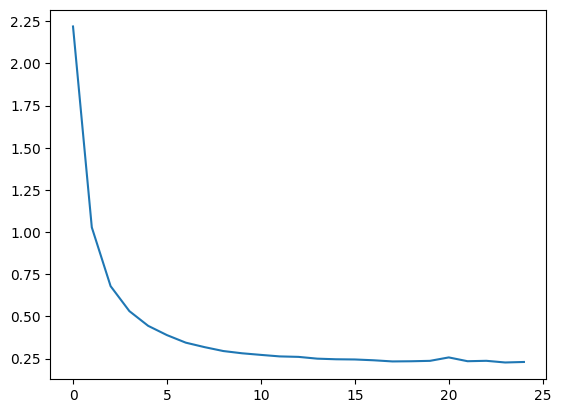

In [114]:
plt.plot(range(epochs),history['loss'],label="loss")

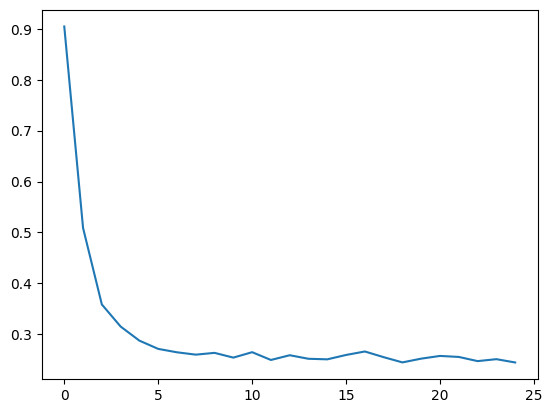

In [115]:
plt.plot(range(epochs),history['val_loss'],label="val_loss")

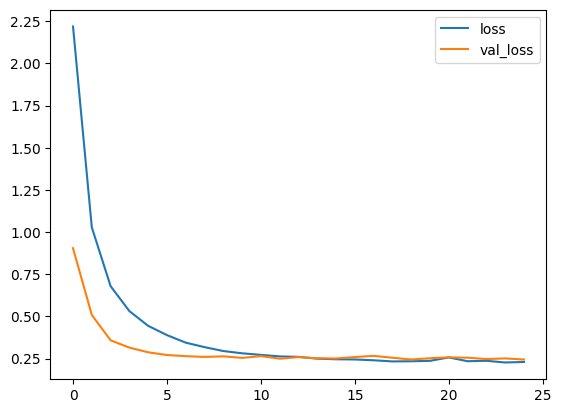

In [116]:
plt.plot(range(epochs),history['loss'],label="loss")
plt.plot(range(epochs),history['val_loss'],label="val_loss")
plt.legend()

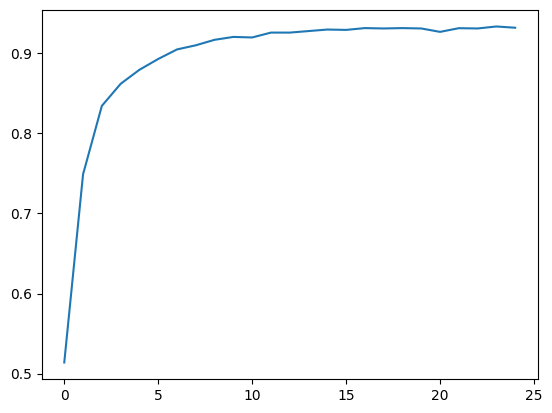

In [117]:
plt.plot(range(epochs),history['accuracy'],label="accuracy")

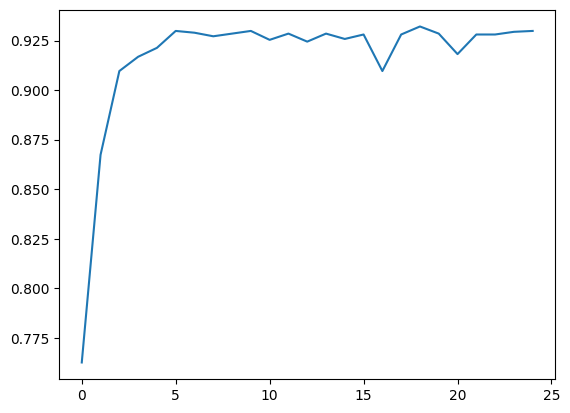

In [118]:
plt.plot(range(epochs),history['val_accuracy'],label="val_accuracy")

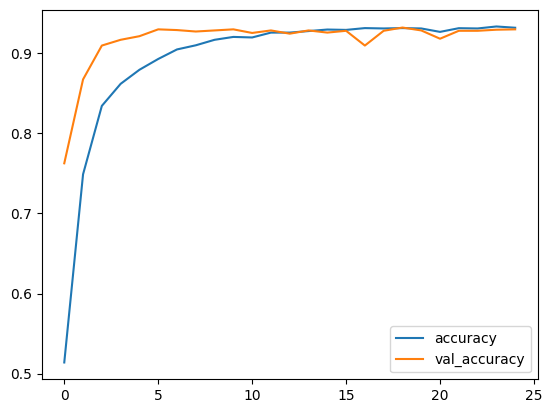

In [119]:
plt.plot(range(epochs),history['accuracy'],label="accuracy")
plt.plot(range(epochs),history['val_accuracy'],label="val_accuracy")
plt.legend()

### Testing the model

In [498]:
text="def space add underscr numbers paropn a com  space b parcls  cln  nwline return space a space  pls  space b nwline result space eql space"

In [499]:
print(text)

def space add underscr numbers paropn a com  space b parcls  cln  nwline return space a space  pls  space b nwline result space eql space


In [500]:
num_words=10

In [501]:
for i in range(0,num_words):
    test_text=code_tokenizer.texts_to_sequences([text])[0]
    test_text=pad_sequences([test_text],maxlen=max_length-1,padding="pre")
    predict=autocode.predict(test_text)
    probability=np.argmax(predict,axis=-1)[0]
    if probability != 0:
        output_word=code_tokenizer.index_word[probability]
        text+=" "+output_word

1/1 [==============================] - 0s 14ms/step


In [502]:
print(text)

def space add underscr numbers paropn a com  space b parcls  cln  nwline return space a space  pls  space b nwline result space eql space add paropn mul sqropn 3 com space 5 sqrcls parcls


In [503]:
def string_symbols(symbols_dict,sentence):
    keys=list(symbols_dict.keys())
    values=list(symbols_dict.values())
    words=sentence.split(" ")
    for word in words:
        if word in values:
            word_index=words.index(word)
            value_index=values.index(word)
            words[word_index]=" "+keys[value_index]+" "
    string_sentence="".join(words)
    return string_sentence

In [504]:
text=string_symbols(symbols_dict=symbols,sentence=text)

In [505]:
print(text)

def   add _ numbers ( a ,    b )  :  
 return   a    +    b 
 result    =    add (  *  [ 3 ,    5 ]  ) 


In [506]:
autocode.evaluate(test_text)

1/1 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

### Saving model

In [507]:
autocode.save('./autocode.keras')